# Leads and Customers Dataset - Exploration
Matthew Thomas
<br>
mt.paragon5@gmail.com

In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [72]:
leads_and_customers = '..\\data\\leads-and-customers.csv'
lead_scoring_fields = '..\\data\\Lead-Scoring-Fields.csv'

In [83]:
df_lac = pd.read_csv(leads_and_customers)
df_lsf = pd.read_csv(lead_scoring_fields)

In [84]:
df_lac['company_size'].unique()

array(['11/1/1950', '251-1000', '1000-10000', '10-Jan', '10001',
       '101-250', '51-100'], dtype=object)

In [85]:
df_lac['company_size'] = df_lac['company_size'].apply(lambda x: '11-50' if x =="11/1/1950" else x)
df_lac['company_size'] = df_lac['company_size'].apply(lambda x: '1-10' if x =="10-Jan" else x)
df_lac['company_size'] = df_lac['company_size'].apply(lambda x: '10001 plus' if x =="10001" else x)
df_lac['company_size'] = df_lac['company_size'].apply(lambda x: x.replace('-', ' to '))
# df_lac['company_size'] = df_lac['company_size'].apply(lambda x: '=\'11-50' if x =="11/1/1950" else x)
# df_lac['company_size'] = df_lac['company_size'].apply(lambda x: '=\'1-10' if x =="10-Jan" else x)

In [86]:
df_lac['company_size'].unique()

array(['11 to 50', '251 to 1000', '1000 to 10000', '1 to 10',
       '10001 plus', '101 to 250', '51 to 100'], dtype=object)

In [88]:
df_lac.score

address                                object
birthdate                              object
mail                                   object
name                                   object
sex                                    object
username                               object
days_since_signup                       int64
acquisition_channel                    object
job_title                              object
company_size                           object
completed_form                          int64
visited_pricing                         int64
registered_for_webinar                  int64
attended_webinar                        int64
industry                               object
converted                               int64
is_manager                               bool
acquisition_channel_Cold Call           int64
acquisition_channel_Cold Email          int64
acquisition_channel_Organic Search      int64
acquisition_channel_Paid Leads          int64
acquisition_channel_Paid Search   

In [82]:
df_lac.to_csv('..\\data\\leads-and-customers-new.csv')

#### checking for null / na values

In [4]:
# df_lac.isnull().sum()
# df_lac.isna().sum()

#### checking types

In [5]:
df_lac.dtypes

address                                object
birthdate                              object
mail                                   object
name                                   object
sex                                    object
username                               object
days_since_signup                       int64
acquisition_channel                    object
job_title                              object
company_size                           object
completed_form                          int64
visited_pricing                         int64
registered_for_webinar                  int64
attended_webinar                        int64
industry                               object
converted                               int64
is_manager                               bool
acquisition_channel_Cold Call           int64
acquisition_channel_Cold Email          int64
acquisition_channel_Organic Search      int64
acquisition_channel_Paid Leads          int64
acquisition_channel_Paid Search   

### Renaming column names

In [6]:
df_lac.columns = map(str.lower, df_lac.columns)
df_lac.columns = df_lac.columns.str.replace(' ', '_')
df_lac.columns = df_lac.columns.str.replace('-', '_to_')
df_lac.columns = df_lac.columns.str.replace('+', '_plus')

### Looking to see the relationship between emails and frequency of conversion
#### Observation: 
- email addresses do not always correspond to the same username or score
- likely renders this attribute useless

In [7]:
df_duplicate_emails = df_lac[df_lac.duplicated(subset=['mail'], keep=False)]
df_duplicate_emails.shape

(23794, 36)

In [8]:
df_lac['mail_total_freq'] = df_lac.groupby('mail')['mail'].transform('count')
df_lac['mail_total_converted'] = df_lac.groupby('mail')['converted'].transform('sum')
# performing a check
df_lac[df_lac.mail=='qturner@hotmail.com'][['mail','username','mail_total_freq','converted','mail_total_converted', 'score']]

,mail,username,mail_total_freq,converted,mail_total_converted,score
0,qturner@hotmail.com,debrapeterson,2,1,1,151.000000
83357,qturner@hotmail.com,smithkatherine,2,0,1,35.075625


In [10]:
df_lac[df_lac.mail_total_freq>2][['mail','username','mail_total_freq','converted','mail_total_converted', 'score']].head()

,mail,username,mail_total_freq,converted,mail_total_converted,score
2,sbrown@yahoo.com,aarongriffin,7,0,0,120.448748
7,dsmith@hotmail.com,benjamin62,8,0,1,27.005505
11,angelasmith@hotmail.com,sandrawallace,4,0,2,135.322023
24,mfox@hotmail.com,hsmith,3,0,1,121.508668
33,jennifer98@yahoo.com,dbeck,4,0,2,143.246919


In [11]:
for i in range(6):
    print('freq email >',i)
    print(df_lac[df_lac.mail_total_freq>i][['mail_total_freq','converted','mail_total_converted', 'score']].mean())
    print(50*'-')

freq email > 0
mail_total_freq           1.447620
converted                 0.228260
mail_total_converted      0.329960
score                   120.906901
dtype: float64
--------------------------------------------------
freq email > 1
mail_total_freq           2.881231
converted                 0.227452
mail_total_converted      0.654871
score                   120.635649
dtype: float64
--------------------------------------------------
freq email > 2
mail_total_freq           4.252686
converted                 0.228513
mail_total_converted      0.968199
score                   121.053892
dtype: float64
--------------------------------------------------
freq email > 3
mail_total_freq           5.472959
converted                 0.227996
mail_total_converted      1.241994
score                   120.506428
dtype: float64
--------------------------------------------------
freq email > 4
mail_total_freq           6.584667
converted                 0.215854
mail_total_converted      1.442

### Looking to see the relationship between usernames and frequency of conversion
#### Observation: 
- usernames addresses do not always correspond to the same username or score
- likely renders this attribute useless

In [12]:
df_duplicate_usernames = df_lac[df_lac.duplicated(subset=['username'], keep=False)]
df_duplicate_usernames.shape

(43135, 38)

In [13]:
df_lac['username_total_freq'] = df_lac.groupby('username')['username'].transform('count')
df_lac['username_total_converted'] = df_lac.groupby('username')['converted'].transform('sum')
# performing a check
df_lac[['mail','username','username_total_freq','converted','username_total_converted', 'score']]

,mail,username,username_total_freq,converted,username_total_converted,score
0,qturner@hotmail.com,debrapeterson,1,1,1,151.000000
1,carramy@yahoo.com,mbrooks,1,0,0,141.358438
2,sbrown@yahoo.com,aarongriffin,1,0,0,120.448748
3,bdixon@gmail.com,jeffreymorales,1,1,1,250.335264
4,harrisandrea@gmail.com,hamiltoncameron,1,0,0,0.000000
5,colemanamber@gmail.com,sandraparker,1,0,0,131.045104
6,smithstephen@gmail.com,amy73,2,0,0,139.291997
7,dsmith@hotmail.com,benjamin62,2,0,0,27.005505
8,jenniferbates@yahoo.com,bmacdonald,1,1,1,273.218420
9,tammypayne@hotmail.com,linkevin,1,0,0,103.527152


In [15]:
df_lac[df_lac.username_total_freq>1][['mail','username','username_total_freq','converted','username_total_converted', 'score']].head()

,mail,username,username_total_freq,converted,username_total_converted,score
6,smithstephen@gmail.com,amy73,2,0,0,139.291997
7,dsmith@hotmail.com,benjamin62,2,0,0,27.005505
12,rachelgolden@gmail.com,davidhayes,2,1,1,260.905220
15,jenniferlewis@gmail.com,oacosta,3,1,2,151.000000
16,johnnymendez@gmail.com,campbellashley,2,0,0,126.673557


In [16]:
for i in range(33):
    print('freq username >',i)
    print(df_lac[df_lac.username_total_freq>i][['username_total_freq','converted','username_total_converted', 'score']].mean())
    print(50*'-')

freq username > 0
username_total_freq           2.334680
converted                     0.228260
username_total_converted      0.540330
score                       120.906901
dtype: float64
--------------------------------------------------
freq username > 1
username_total_freq           4.094193
converted                     0.227356
username_total_converted      0.950829
score                       121.176059
dtype: float64
--------------------------------------------------
freq username > 2
username_total_freq           5.670432
converted                     0.229328
username_total_converted      1.328187
score                       121.166047
dtype: float64
--------------------------------------------------
freq username > 3
username_total_freq           7.225408
converted                     0.232673
username_total_converted      1.711007
score                       121.462772
dtype: float64
--------------------------------------------------
freq username > 4
username_total_freq   

### A look at some scatter plots
- fields with high values e.g., score, days_since, etc. and converted

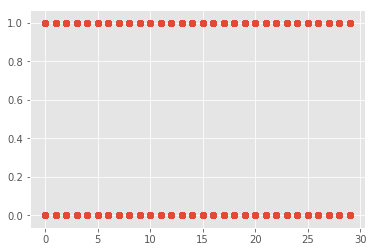

In [17]:
df_high_values = df_lac[['days_since_signup','score','converted']]
df_high_values

plt.scatter(df_lac.days_since_signup, df_lac.converted)
plt.show()

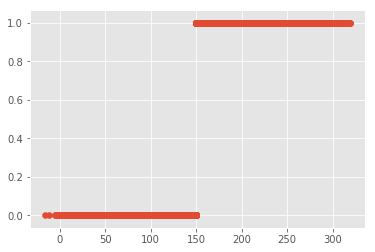

In [18]:
plt.scatter(df_lac.score, df_lac.converted)
plt.show()

### Column manipulation
 - change birthdate to datetime
 - add age_seconds column (int); not sure if useful
 - added year_month column to investigate trends in scores by age groups
 - added the following columns:
    - age_seconds
    - bd_year_month
    - bd_month
    - is_male
    - is_manager
    - is_director
    - is_vp
    - is_admin
    - is_chief_officer
    - is_advertising
    - is_sales
    - is_marketing
    - is_other
    - is_web_ind
    - is_financials_ind
    - is_furniture_ind
    - is_transportation_ind
    - is_manufacturing_ind
    - is_scandesign_ind
    - score_normalized
    - zip_code


In [19]:
score_max = df_lac['score'].max()
days_since_signup_max = df_lac['days_since_signup'].max()

In [20]:
df_lac.birthdate = pd.to_datetime(df_lac.birthdate)
df_lac['age_seconds'] = df_lac.birthdate.map(dt.datetime.toordinal)
df_lac['bd_year_month'] = df_lac.birthdate.apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
df_lac['bd_month'] = df_lac.birthdate.apply(lambda x: '{month}'.format(month=int(x.month)) if len(str(x.month)) > 1 else '{0}{month}'.format(0, month=int(x.month)))
df_lac['is_male'] = df_lac.sex.apply(lambda x: 1 if x=='M' else 0)
df_lac['is_manager'] = df_lac.job_title.apply(lambda x: 1 if 'Manager' in x else 0)
df_lac['is_director'] = df_lac.job_title.apply(lambda x: 1 if 'Director' in x else 0)
df_lac['is_vp'] = df_lac.job_title.apply(lambda x: 1 if 'VP' in x else 0)
df_lac['is_admin'] = df_lac.job_title.apply(lambda x: 1 if 'Administrator' in x else 0)
df_lac['is_chief_officer'] = df_lac.job_title.apply(lambda x: 1 if ('Chief' in x and 'Officer' in x) else 0)
df_lac['is_advertising'] = df_lac.job_title.apply(lambda x: 1 if 'Advertising' in x else 0)
df_lac['is_sales'] = df_lac.job_title.apply(lambda x: 1 if 'Sales' in x else 0)
df_lac['is_marketing'] = df_lac.job_title.apply(lambda x: 1 if 'Marketing' in x else 0)
df_lac['is_other'] = df_lac.job_title.apply(lambda x: 1 if ('Advertising' not in x and 'Marketing' not in x and 'Advertising' not in x) else 0)
df_lac['is_web_ind'] = df_lac.industry.apply(lambda x: 1 if 'Web' in x else 0)
df_lac['is_financials_ind'] = df_lac.industry.apply(lambda x: 1 if 'Financial' in x else 0)
df_lac['is_furniture_ind'] = df_lac.industry.apply(lambda x: 1 if 'Furniture' in x else 0)
df_lac['is_transportation_ind'] = df_lac.industry.apply(lambda x: 1 if 'Transportation' in x else 0)
df_lac['is_manufacturing_ind'] = df_lac.industry.apply(lambda x: 1 if 'Manufacturing' in x else 0)
df_lac['is_scandesign_ind'] = df_lac.industry.apply(lambda x: 1 if 'Scandanavion' in x else 0)
df_lac['score_normalized'] = df_lac.score.apply(lambda x: x / score_max)
df_lac['days_since_signup_normalized'] = df_lac.days_since_signup.apply(lambda x: x / days_since_signup_max)
df_lac['zip_code'] = df_lac.address.apply(lambda x: ''.join(c for c in x[-10:] if c.isdigit())[:5])
df_lac['score_normalized'] = df_lac.score.apply(lambda x: x / score_max)

# df_lac.bd_year_month = pd.to_datetime(df_lac.birthdate, format='%Y-%m')

In [21]:
df_grouped_by_ym = df_lac.set_index('bd_year_month').groupby('bd_year_month')
df_grouped_by_m = df_lac.set_index('bd_month').groupby('bd_month')
# df_grouped_by_zip = df_lac.groupby('zip_code')

df_score_grouped_by_ym = df_grouped_by_ym['score']
df_score_grouped_by_m = df_grouped_by_m['score']
# df_score_grouped_by_zip = df_grouped_by_zip['score']

In [22]:
df_ym_described = df_score_grouped_by_ym.describe()
df_m_described = df_score_grouped_by_m.describe()
# df_zip_described = df_score_grouped_by_zip.describe()

In [23]:
'zip_min: {0} -- zip_max: {1}'.format(df_lac['zip_code'].min(), df_lac['zip_code'].max())

'zip_min: 00001 -- zip_max: 99998'

### A look at the described score that's groupedby month of birth

#### Observation:
- customers born in June seem to have lower average scores

In [24]:
def plot_df_described(df_described_to_plot):

    fig, axs = plt.subplots(7,1,figsize=(15,25))

    axs[0].plot(df_described_to_plot.index, df_described_to_plot['max'])
    axs[1].plot(df_described_to_plot.index, df_described_to_plot['75%'])
    axs[2].plot(df_described_to_plot.index, df_described_to_plot['50%'])
    axs[3].plot(df_described_to_plot.index, df_described_to_plot['25%'])
    axs[4].plot(df_described_to_plot.index, df_described_to_plot['min'])
    axs[5].plot(df_described_to_plot.index, df_described_to_plot['mean'])
    axs[6].plot(df_described_to_plot.index, df_described_to_plot['std'])

    axs[0].set_ylabel('max')
    axs[1].set_ylabel('75%')
    axs[2].set_ylabel('50%')
    axs[3].set_ylabel('25%')
    axs[4].set_ylabel('min')
    axs[5].set_ylabel('mean')
    axs[6].set_ylabel('std')


    plt.show()

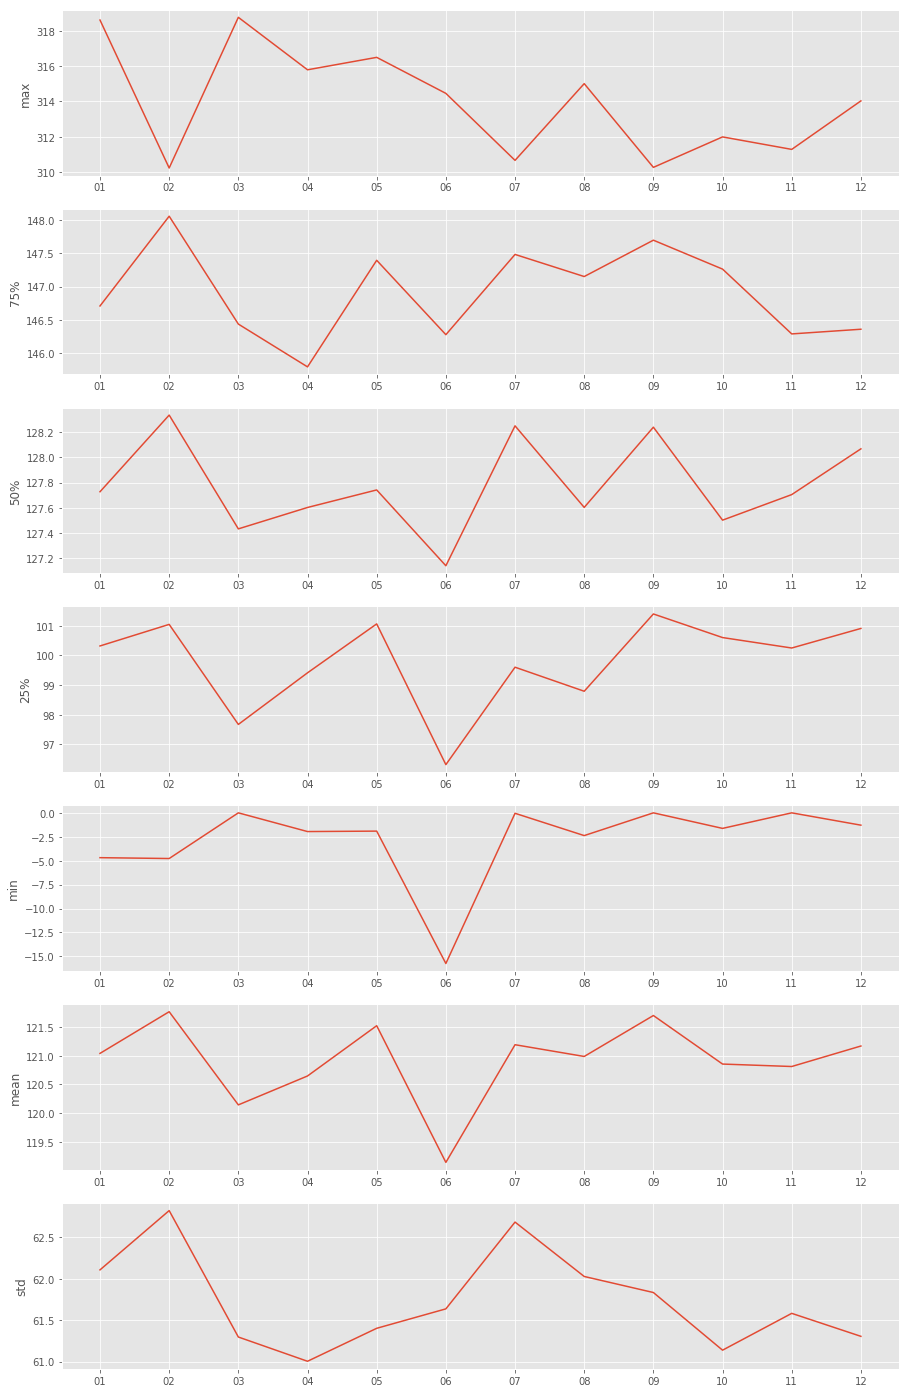

In [25]:
# ----- plots of the score df groupedby month  ----- #
plot_df_described(df_m_described)

### A look at the described score that's groupedby year_month of birth

#### Observation:
- customers seem to be evenly distributed across birth year/birth month
- not so much for birth month only

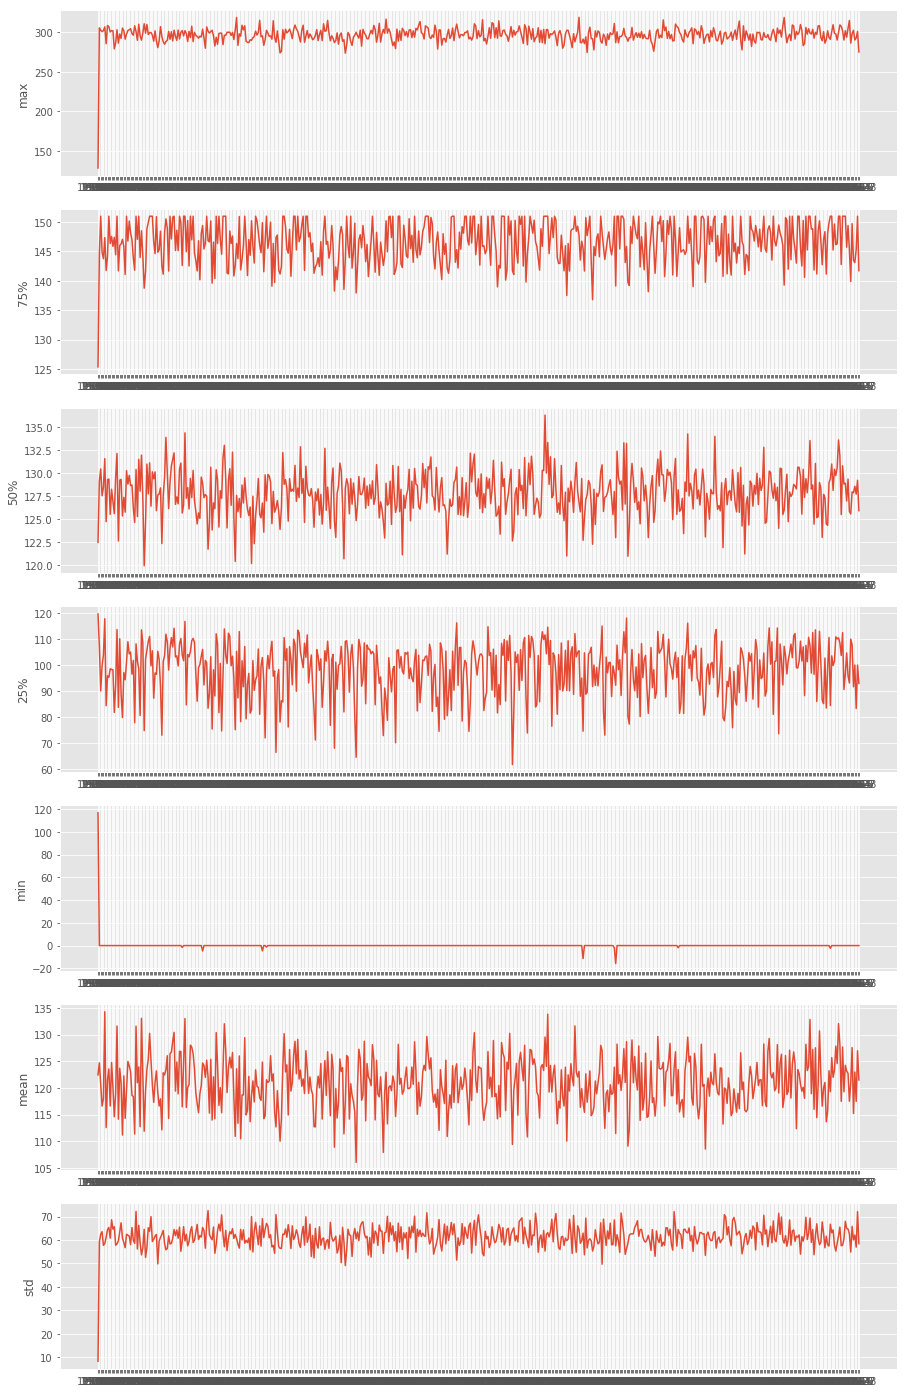

In [26]:
# ----- plots of the score df groupedby year_month  ----- #
plot_df_described(df_ym_described)

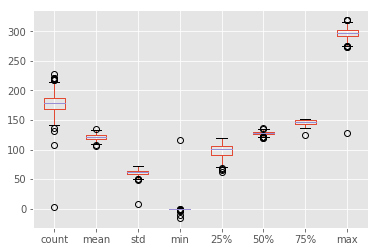

In [27]:
df_ym_described.boxplot(column=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

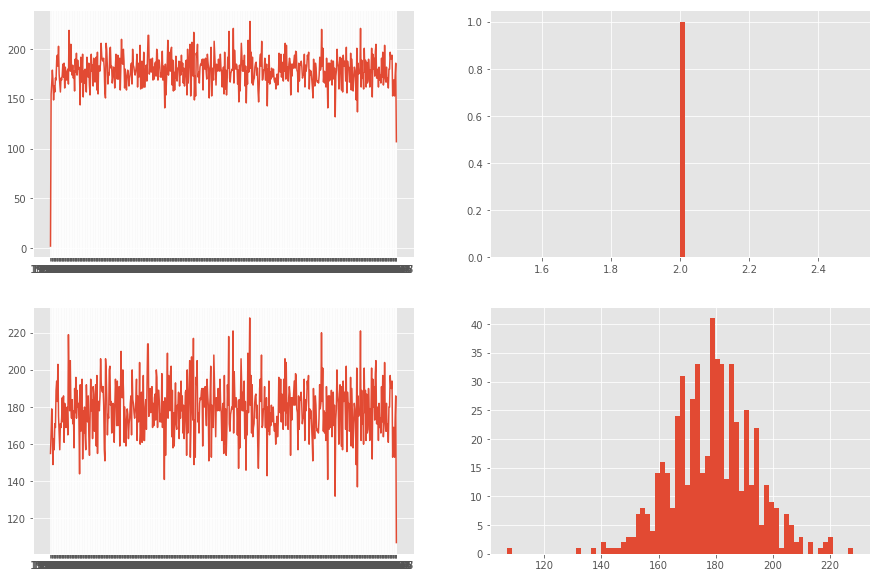

In [28]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

bin_count = (df_ym_described['count'].count()) // 8

axs[0,0].plot(df_ym_described['count'])
axs[0,1].hist(df_ym_described[df_ym_described['count']<100]['count'], bins=bin_count)
axs[1,0].plot(df_ym_described[df_ym_described['count']>100]['count'])
axs[1,1].hist(df_ym_described[df_ym_described['count']>100]['count'], bins=bin_count)

plt.show()

In [29]:
df_ym_described[df_ym_described['count']<100]

,count,mean,std,min,25%,50%,75%,max
bd_year_month,,,,,,,,
1969-12,2.0,122.433074,8.227271,116.615515,119.524294,122.433074,125.341853,128.250633


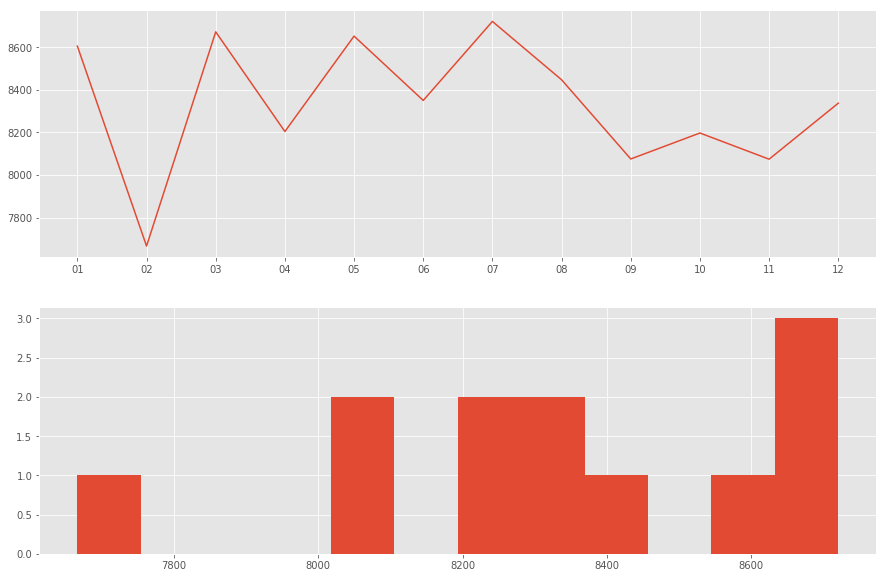

In [30]:
# ----- just a comparison distribution of the months of birth ----- #

fig, axs = plt.subplots(2,1,figsize=(15,10))

axs[0].plot(df_m_described['count'])
axs[1].hist(df_m_described['count'], bins=12)


plt.show()

### A look at the described score that's groupedby zip_code

#### observation: 
 - zip codes seem to be from 00000 to 99998; weird since there are 100000 records -- Q: is there something wrong with my code?
     - the mean of the zip codes for both 0 and 1 conversion rates are both ~ 49,960 (when considered an integer)
     - that, combined with the fact the bdays are to recent, the data could have been created
 - the max count of any given zip seems to be 4

In [31]:
# df_zip_described.index.unique()

In [32]:
# df_zip_described.boxplot(column=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

In [33]:
# ----- plots of the score df groupedby zip_code  ----- #
# plot_df_described(df_zip_described)

In [34]:
# df_lac.dtypes

### Some resampling of the data

#### df of each column with number value and its mean resampled by year

In [35]:
df_resampled = (
    df_lac.set_index('birthdate')
        .resample('y')
        .agg({'score': 'mean', 
                'days_since_signup':'mean',
                'completed_form':'mean',
                'visited_pricing':'mean',
                'registered_for_webinar':'mean',
                'attended_webinar':'mean',
                'converted':'mean',
                'is_manager':'mean',
                'acquisition_channel_cold_call':'mean',
                'acquisition_channel_cold_email':'mean',
                'acquisition_channel_organic_search':'mean',
                'acquisition_channel_paid_leads':'mean',
                'acquisition_channel_paid_search':'mean',
                'company_size_1_to_10':'mean',
                'company_size_1000_to_10000':'mean',
                'company_size_10001_plus':'mean',
                'company_size_101_to_250':'mean',
                'company_size_11_to_50':'mean',
                'company_size_251_to_1000':'mean',
                'company_size_51_to_100':'mean',
                'industry_financial_services':'mean',
                'industry_furniture':'mean',
                'industry_heavy_manufacturing':'mean',
                'scandanavion_design':'mean',
                'transportation':'mean',
                'internet':'mean',
                'score':'mean',
                'age_seconds':'mean',
                'is_male':'mean',
                'is_director':'mean',
                'is_vp':'mean',
                'is_admin':'mean',
                'is_chief_officer':'mean',
                'is_advertising':'mean',
                'is_sales':'mean',
                'is_marketing':'mean',
                'is_other':'mean',
                'is_web_ind':'mean',
                'is_financials_ind':'mean',
                'is_furniture_ind':'mean',
                'is_transportation_ind':'mean',
                'is_manufacturing_ind':'mean',
                'is_scandesign_ind':'mean',
                'score_normalized':'mean',
                'days_since_signup_normalized':'mean'})
)
df_resampled

,score,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,converted,is_manager,acquisition_channel_cold_call,acquisition_channel_cold_email,...,is_marketing,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized,days_since_signup_normalized
birthdate,,,,,,,,,,,,,,,,,,,,,
1969-12-31,122.433074,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.384069,0.689655
1970-12-31,120.489006,13.987769,0.794031,0.893836,0.198141,0.104697,0.226517,0.438845,0.206947,0.245108,...,0.132583,0.700098,0.613014,0.196184,0.051859,0.089530,0.045010,0.004403,0.377971,0.482337
1971-12-31,120.721435,14.480248,0.802475,0.875297,0.197049,0.097573,0.224179,0.426940,0.182770,0.240362,...,0.122799,0.715850,0.587339,0.213232,0.055688,0.096621,0.043313,0.003808,0.378700,0.499319
1972-12-31,120.678449,14.301183,0.802548,0.886260,0.191993,0.097816,0.223385,0.451319,0.202457,0.249318,...,0.131028,0.713376,0.585532,0.209736,0.054140,0.086897,0.057780,0.005914,0.378565,0.493144
1973-12-31,120.874375,14.204545,0.801610,0.887311,0.201705,0.099905,0.229167,0.447917,0.202652,0.225379,...,0.125000,0.711174,0.600852,0.191288,0.045455,0.107481,0.051610,0.003314,0.379179,0.489812
1974-12-31,123.883358,14.634286,0.804286,0.880000,0.189048,0.100000,0.244286,0.433810,0.190000,0.251429,...,0.125714,0.719524,0.609048,0.209048,0.043810,0.088095,0.046190,0.003810,0.388619,0.504631
1975-12-31,123.433459,14.714759,0.784295,0.886471,0.195364,0.103122,0.242195,0.410123,0.201987,0.247398,...,0.114475,0.712867,0.599338,0.207190,0.045412,0.095080,0.049669,0.003311,0.387207,0.507405
1976-12-31,120.261013,15.224750,0.807097,0.891265,0.202457,0.100091,0.226115,0.437216,0.194268,0.255687,...,0.141037,0.700637,0.598726,0.209736,0.036397,0.095086,0.055505,0.004550,0.377255,0.524991
1977-12-31,122.245198,14.788311,0.784169,0.865163,0.212149,0.113668,0.233318,0.429360,0.212609,0.240681,...,0.118270,0.724804,0.600552,0.204786,0.043718,0.096641,0.051081,0.003221,0.383480,0.509942


### A look at the df grouped by converted
 - creating an aggregated df of the original df grouped by converted
 - adding a row to show the difference in mean values
     - a positive difference shows a greater chance of converting than not

In [36]:
df_groupedby_converted = (
    df_lac.groupby('converted')
        .agg({'score': 'mean', 
                'days_since_signup':'mean',
                'completed_form':'mean',
                'visited_pricing':'mean',
                'registered_for_webinar':'mean',
                'attended_webinar':'mean',
                'is_manager':'mean',
                'acquisition_channel_cold_call':'mean',
                'acquisition_channel_cold_email':'mean',
                'acquisition_channel_organic_search':'mean',
                'acquisition_channel_paid_leads':'mean',
                'acquisition_channel_paid_search':'mean',
                'company_size_1_to_10':'mean',
                'company_size_1000_to_10000':'mean',
                'company_size_10001_plus':'mean',
                'company_size_101_to_250':'mean',
                'company_size_11_to_50':'mean',
                'company_size_251_to_1000':'mean',
                'company_size_51_to_100':'mean',
                'industry_financial_services':'mean',
                'industry_furniture':'mean',
                'industry_heavy_manufacturing':'mean',
                'scandanavion_design':'mean',
                'transportation':'mean',
                'internet':'mean',
                'score':'mean',
                'age_seconds':'mean',
                'is_male':'mean',
                'is_director':'mean',
                'is_vp':'mean',
                'is_admin':'mean',
                'is_chief_officer':'mean',
                'is_advertising':'mean',
                'is_sales':'mean',
                'is_marketing':'mean',
                'is_other':'mean',
                'is_web_ind':'mean',
                'is_financials_ind':'mean',
                'is_furniture_ind':'mean',
                'is_transportation_ind':'mean',
                'is_manufacturing_ind':'mean',
                'is_scandesign_ind':'mean',
                'score_normalized':'mean',
                'days_since_signup_normalized':'mean'})
)
df_groupedby_converted

,score,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,is_manager,acquisition_channel_cold_call,acquisition_channel_cold_email,acquisition_channel_organic_search,...,is_marketing,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized,days_since_signup_normalized
converted,,,,,,,,,,,,,,,,,,,,,
0,99.976468,14.737295,0.789890,0.873675,0.100759,0.012362,0.452354,0.208619,0.263949,0.388965,...,0.126144,0.714450,0.596976,0.190932,0.052259,0.102159,0.052440,0.005235,0.313623,0.508183
1,191.672046,13.914790,0.835845,0.902480,0.534434,0.399369,0.386226,0.174056,0.202664,0.442653,...,0.120477,0.736309,0.606370,0.241391,0.038114,0.072987,0.037633,0.003505,0.601270,0.479820


In [37]:
df_converted_diff = df_groupedby_converted.diff()
df_converted_diff = df_converted_diff.rename(index={1: 'diff'}).drop(index=0)
df_aggregated_gb_converted = pd.concat([df_groupedby_converted, df_converted_diff])

df_aggregated_gb_converted

,score,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,is_manager,acquisition_channel_cold_call,acquisition_channel_cold_email,acquisition_channel_organic_search,...,is_marketing,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized,days_since_signup_normalized
converted,,,,,,,,,,,,,,,,,,,,,
0,99.976468,14.737295,0.789890,0.873675,0.100759,0.012362,0.452354,0.208619,0.263949,0.388965,...,0.126144,0.714450,0.596976,0.190932,0.052259,0.102159,0.052440,0.005235,0.313623,0.508183
1,191.672046,13.914790,0.835845,0.902480,0.534434,0.399369,0.386226,0.174056,0.202664,0.442653,...,0.120477,0.736309,0.606370,0.241391,0.038114,0.072987,0.037633,0.003505,0.601270,0.479820
diff,91.695578,-0.822505,0.045955,0.028805,0.433675,0.387007,-0.066128,-0.034564,-0.061285,0.053688,...,-0.005667,0.021859,0.009394,0.050459,-0.014144,-0.029172,-0.014807,-0.001730,0.287646,-0.028362


### A look at the fields with conversion rates of various thresholds

#### Observations: 
  - there seems to be a threshold of ~ 14 days since signed up and conversion rate
      - conversion drops below 50% after ~13.9 days
      
      
  - conversion rate < 50%:
     - See below
     
     
- conversion rate > 50%:
     - score
     - days_since_signup
     - completed_form
     - visited_pricing
     - registered_for_webinar
     - internet
     - is_male
     - is_other
     - score_normalized
     

- conversion rate > 75%:
     - days_since_signup
     - days_since_signup
     - completed_form
     - visited_pricing
     

 

In [38]:
df_aggregated_gb_converted_T = df_aggregated_gb_converted.T
df_zero_converted = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T[:]==0]
df_all_converted = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T[:]==1]
df_lt50_converted = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T[1]<.5]
df_gt50_converted = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T[1]>.5]
df_gt75_converted = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T[1]>.75]

In [39]:
df_zero_converted.dropna()

converted,0,1,diff


In [40]:
df_all_converted.dropna()

converted,0,1,diff


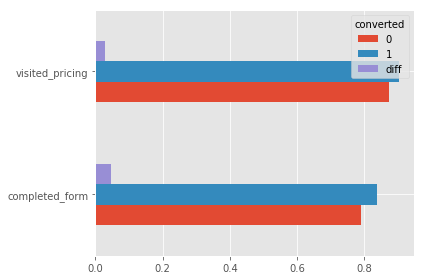

In [41]:
df_gt75_converted.drop(['age_seconds', 'score', 'days_since_signup']).plot(kind='barh')
plt.tight_layout()
plt.show()

In [42]:
df_diff_zero_converted = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T['diff']==0]
df_diff_all_converted = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T['diff']==1]
df_diff_pos_converted = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T['diff']>0]
df_diff_neg_converted = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T['diff']<0]

### A look at the fields with lt50% and gt50% failure to convert

##### Observations: 
 - fields with a < 50% failure to convert rate WITH a > 5% chance of converting:
     - registered_for_webinar
     - attended_webinar
     - acquisition_channel_organic_search
     - acquisition_channel_paid_leads
     - company_size_251_to_1000
     - industry_financial_services
     - is_director
     - score_normalized


 - fields with a < 50% failure to convert rate WITH a > 10% chance of converting:
     - registered_for_webinar
     - attended_webinar
     - score_normalized

In [43]:
df_lt50_fail_to_convert = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T[0]<.50]
df_gt50_fail_to_convert = df_aggregated_gb_converted_T[df_aggregated_gb_converted_T[0]>.50]

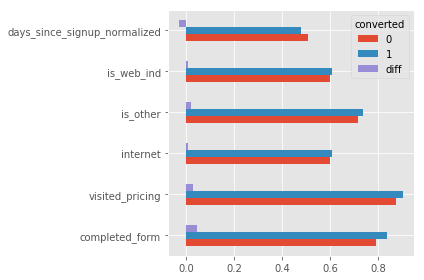

In [44]:
df_gt50_fail_to_convert.drop(['age_seconds', 'score', 'days_since_signup']).plot(kind='barh')
plt.tight_layout()
plt.show()

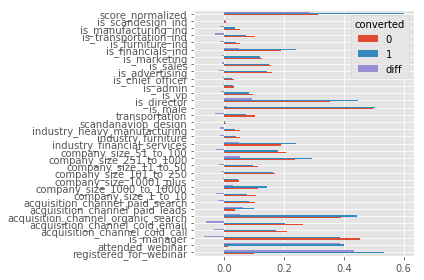

In [45]:
df_lt50_fail_to_convert.plot(kind='barh')
plt.tight_layout()
plt.show()

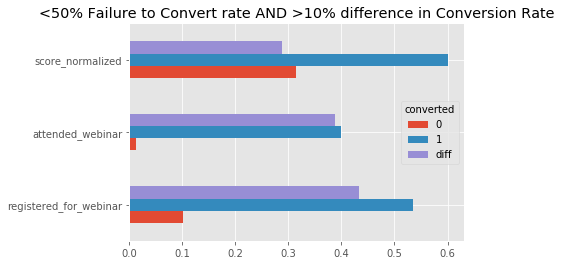

In [46]:
df_gt10pct_pos_diff = df_lt50_fail_to_convert[df_lt50_fail_to_convert['diff']>0.09999]
df_gt10pct_pos_diff
df_gt10pct_pos_diff.plot(kind='barh')
plt.title('<50% Failure to Convert rate AND >10% difference in Conversion Rate')
plt.show()

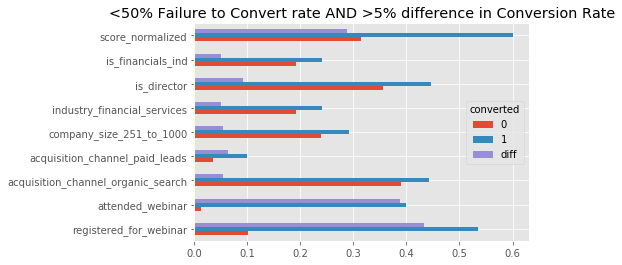

In [47]:
df_gt5pct_pos_diff = df_lt50_fail_to_convert[df_lt50_fail_to_convert['diff']>0.04999]
df_gt5pct_pos_diff.plot(kind='barh')
plt.title('<50% Failure to Convert rate AND >5% difference in Conversion Rate')
plt.show()

### A look at the fields that show a positive vs negative mean value difference of the converted df

#### Observations: 
 - only age_seconds and score have relative differences > 1; rest are normalized
 - is_male, is_director, and is_other are all positive changes in conversion rate
 - registering for a webinar has a large positive difference

 

In [48]:
df_aggregated_diff_converted_T = df_aggregated_gb_converted.loc['diff'].T

df_positive_diff = df_aggregated_diff_converted_T[df_aggregated_diff_converted_T[:]>0]
df_negative_diff = df_aggregated_diff_converted_T[df_aggregated_diff_converted_T[:]<0]
df_neutral_diff = df_aggregated_diff_converted_T[df_aggregated_diff_converted_T[:]==0]

df_relative_means_lt1 = df_aggregated_diff_converted_T[df_aggregated_diff_converted_T[:]<1]
df_relative_means_gt1 = df_aggregated_diff_converted_T[df_aggregated_diff_converted_T[:]>1]

df_positive_diff = df_positive_diff.drop(['score', 'age_seconds'])

In [49]:
df_neutral_diff.index

Index([], dtype='object')

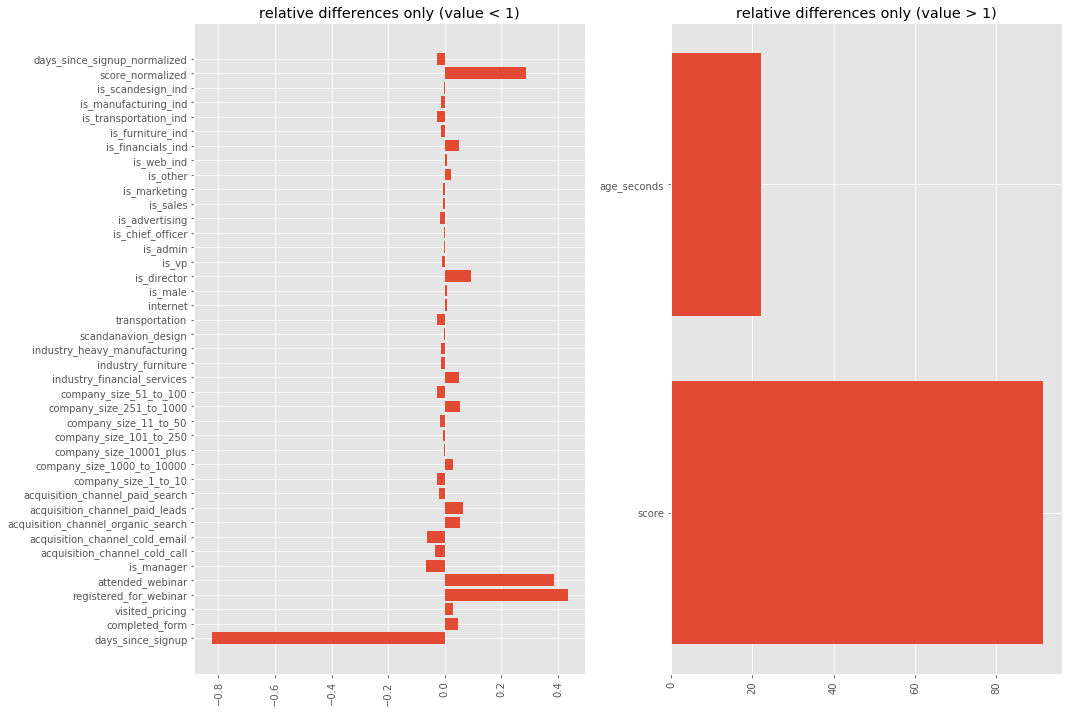

In [50]:
fig, axs = plt.subplots(1,2,figsize=(15,10))

axs[0].barh(df_relative_means_lt1.index, df_relative_means_lt1)
axs[0].set_title('relative differences only (value < 1)')
axs[1].barh(df_relative_means_gt1.index, df_relative_means_gt1)
axs[1].set_title('relative differences only (value > 1)')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

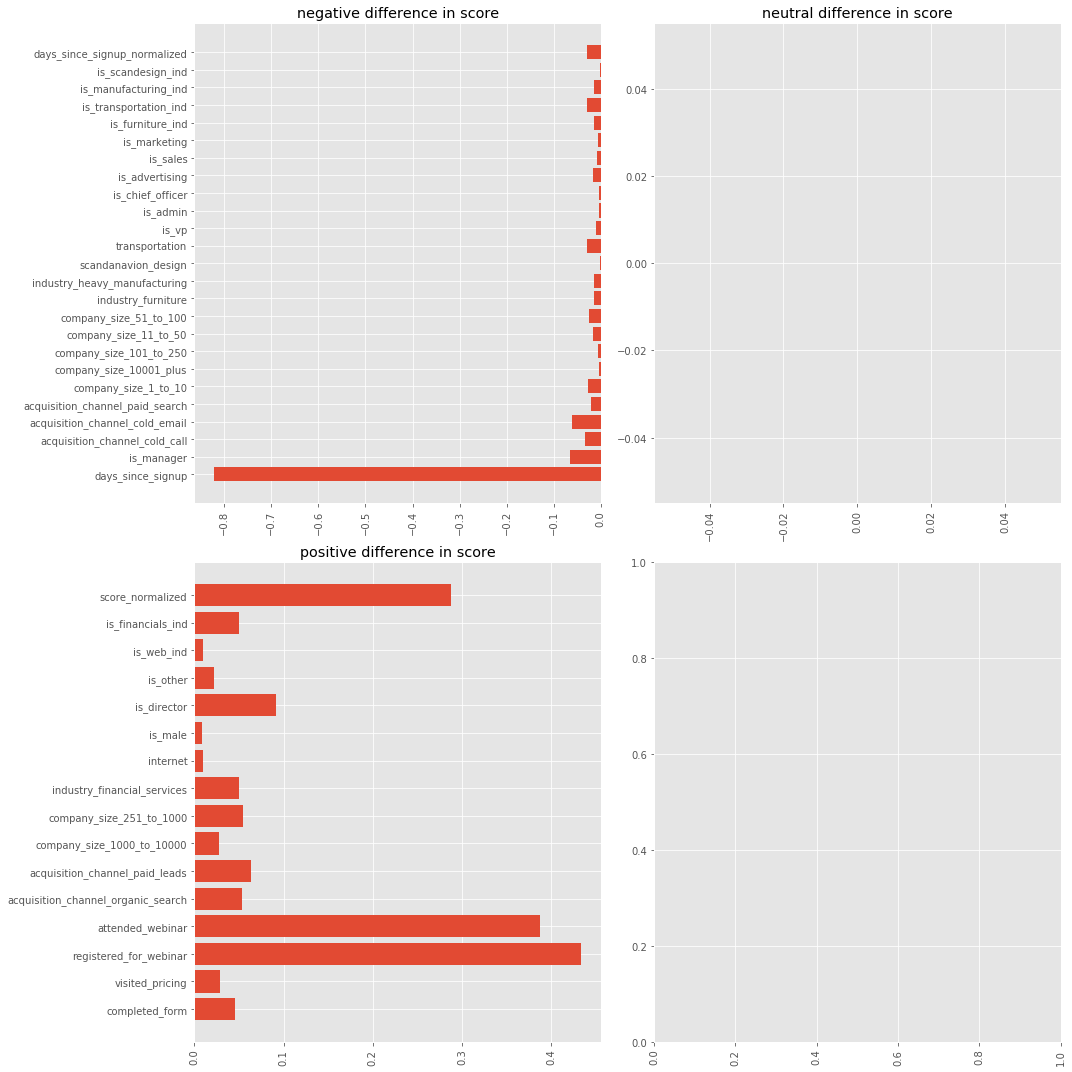

In [51]:
fig, axs = plt.subplots(2,2,figsize=(15,15))

axs[0,0].barh(df_negative_diff.index, df_negative_diff)
axs[0,0].set_title('negative difference in score')
axs[1,0].barh(df_positive_diff.index, df_positive_diff)
axs[1,0].set_title('positive difference in score')
axs[0,1].plot(df_neutral_diff.index, df_neutral_diff)
axs[0,1].set_title('neutral difference in score')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()


In [52]:
df_positive_diff

completed_form                        0.045955
visited_pricing                       0.028805
registered_for_webinar                0.433675
attended_webinar                      0.387007
acquisition_channel_organic_search    0.053688
acquisition_channel_paid_leads        0.063743
company_size_1000_to_10000            0.028176
company_size_251_to_1000              0.054225
industry_financial_services           0.050459
internet                              0.009394
is_male                               0.009127
is_director                           0.091494
is_other                              0.021859
is_web_ind                            0.009394
is_financials_ind                     0.050459
score_normalized                      0.287646
Name: diff, dtype: float64

In [53]:
df_negative_diff

days_since_signup                 -0.822505
is_manager                        -0.066128
acquisition_channel_cold_call     -0.034564
acquisition_channel_cold_email    -0.061285
acquisition_channel_paid_search   -0.021582
company_size_1_to_10              -0.027607
company_size_10001_plus           -0.004562
company_size_101_to_250           -0.006870
company_size_11_to_50             -0.017277
company_size_51_to_100            -0.026085
industry_furniture                -0.014144
industry_heavy_manufacturing      -0.014807
scandanavion_design               -0.001730
transportation                    -0.029172
is_vp                             -0.011233
is_admin                          -0.004437
is_chief_officer                  -0.004143
is_advertising                    -0.016192
is_sales                          -0.007246
is_marketing                      -0.005667
is_furniture_ind                  -0.014144
is_transportation_ind             -0.029172
is_manufacturing_ind            

In [54]:
df_neutral_diff

Series([], Name: diff, dtype: float64)

In [55]:
# ---- playground for finding unique job_titles and industry terms ---- #

# s = ""
# for c in df_lac.job_title.unique():
#     s += c + " "
    
    
# words = s.split()
# uwords = []
# for w in words:
#     if w not in uwords:
#         uwords.append(w)
        
# uwords
# s
# df_lac.job_title.unique()

# df_lac.industry.unique()

# df_lac.internet.unique()

In [56]:
# ------- done graphing so I don't care how the months are sorted now in the xlabels from earlier ------ #
df_lac['bd_month'] = df_lac.bd_month.apply(lambda x: int(x))

#### Clean Up:
- removing non-number value columns
- creating new df

In [68]:
to_drop = ['address', 
           'birthdate', 
           'mail', 
           'name', 
           'sex', 
           'username', 
           'acquisition_channel', 
           'job_title', 
           'company_size', 
           'industry', 
           'bd_year_month',
           'zip_code',
           'mail_total_freq',
           'mail_total_converted',
           'username_total_freq',
           'username_total_converted']

In [69]:
df_numerical = df_lac.drop(columns=to_drop, axis=1)

In [70]:
df_numerical.max()

days_since_signup                         29.000000
completed_form                             1.000000
visited_pricing                            1.000000
registered_for_webinar                     1.000000
attended_webinar                           1.000000
converted                                  1.000000
is_manager                                 1.000000
acquisition_channel_cold_call              1.000000
acquisition_channel_cold_email             1.000000
acquisition_channel_organic_search         1.000000
acquisition_channel_paid_leads             1.000000
acquisition_channel_paid_search            1.000000
company_size_1_to_10                       1.000000
company_size_1000_to_10000                 1.000000
company_size_10001_plus                    1.000000
company_size_101_to_250                    1.000000
company_size_11_to_50                      1.000000
company_size_251_to_1000                   1.000000
company_size_51_to_100                     1.000000
industry_fin

In [72]:
df_numerical
df_numerical.to_json('..\\data\\cleaned_df_numerical_columns_only.json')

### A test to see differences when duplicate usernames are dropped

#### Observations: 
 - verly little difference in df grouped by conversion rate


In [73]:
df_test = df_lac.groupby(["username"]).filter(lambda df:df.shape[0] == 1)

In [74]:
df_test

,address,birthdate,mail,name,sex,username,days_since_signup,acquisition_channel,job_title,company_size,...,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized,days_since_signup_normalized,zip_code
0,"27105 Christopher Station\r\nKevinborough, WA ...",2010-08-08,qturner@hotmail.com,Samuel Simpson,M,debrapeterson,18,Organic Search,Marketing Director,11/01/50,...,0,1,0,0,0,0,0,0.473683,0.620690,91949
1,"78597 Gina Grove\r\nNorth Rebeccaberg, IL 61475",1981-12-04,carramy@yahoo.com,Angelica Sanchez,F,mbrooks,3,Organic Search,Promotion Manager,251-1000,...,1,1,0,0,0,0,0,0.443437,0.103448,61475
2,"0628 Sanders Plains\r\nLake Jenna, VA 56410",1979-04-25,sbrown@yahoo.com,Connie Taylor,F,aarongriffin,26,Organic Search,Information Systems Manager,1000-10000,...,1,1,0,0,0,0,0,0.377844,0.896552,56410
3,"9774 Moore Square Suite 477\r\nGonzalezfurt, O...",2005-07-13,bdixon@gmail.com,Alexis Jones,F,jeffreymorales,19,Cold Email,Territory Sales Manager,10-Jan,...,1,1,0,0,0,0,0,0.785295,0.655172,08748
4,"77324 John Tunnel\r\nSouth Shirleyfort, WA 364...",1973-06-19,harrisandrea@gmail.com,Lisa Wright,F,hamiltoncameron,7,Organic Search,Data Processing Manager,10001,...,1,1,0,0,0,0,0,0.000000,0.241379,36499
5,9468 Deleon Union Apt. 088\r\nLake Courtneyvil...,1980-12-16,colemanamber@gmail.com,Melody Stewart,F,sandraparker,19,Cold Email,VP Promotions,1000-10000,...,1,0,1,0,0,0,0,0.411085,0.655172,18701
8,0478 Murphy Course Suite 537\r\nPort Matthewbu...,1981-09-07,jenniferbates@yahoo.com,Sara Walker,F,bmacdonald,22,Cold Email,Data Operations Director,1000-10000,...,1,0,1,0,0,0,0,0.857078,0.758621,04022
9,"907 Bennett Cliff\r\nNorth John, KS 30350",1981-01-13,tammypayne@hotmail.com,Joseph Shaw,M,linkevin,14,Paid Search,Computer Operations Manager,101-250,...,1,1,0,0,0,0,0,0.324762,0.482759,30350
10,"8647 Amanda Plaza\r\nWest Bobby, NY 27785-4836",2006-06-17,tstewart@hotmail.com,Joseph Key,M,danielharris,27,Organic Search,Export Manager,101-250,...,1,1,0,0,0,0,0,0.406994,0.931034,27785
11,"384 Green Passage\r\nStevenport, SD 11797",1986-09-01,angelasmith@hotmail.com,Shelly Moon,F,sandrawallace,29,Organic Search,Information Technology Systems Director,51-100,...,1,1,0,0,0,0,0,0.424501,1.000000,11797


In [75]:
df_test.count()

address                               56865
birthdate                             56865
mail                                  56865
name                                  56865
sex                                   56865
username                              56865
days_since_signup                     56865
acquisition_channel                   56865
job_title                             56865
company_size                          56865
completed_form                        56865
visited_pricing                       56865
registered_for_webinar                56865
attended_webinar                      56865
industry                              56865
converted                             56865
is_manager                            56865
acquisition_channel_cold_call         56865
acquisition_channel_cold_email        56865
acquisition_channel_organic_search    56865
acquisition_channel_paid_leads        56865
acquisition_channel_paid_search       56865
company_size_1_to_10            

In [76]:
test_df_groupedby_converted = (
    df_test.groupby('converted')
        .agg({'score': 'mean', 
                'days_since_signup':'mean',
                'completed_form':'mean',
                'visited_pricing':'mean',
                'registered_for_webinar':'mean',
                'attended_webinar':'mean',
                'is_manager':'mean',
                'acquisition_channel_cold_call':'mean',
                'acquisition_channel_cold_email':'mean',
                'acquisition_channel_organic_search':'mean',
                'acquisition_channel_paid_leads':'mean',
                'acquisition_channel_paid_search':'mean',
                'company_size_1_to_10':'mean',
                'company_size_1000_to_10000':'mean',
                'company_size_10001_plus':'mean',
                'company_size_101_to_250':'mean',
                'company_size_11_to_50':'mean',
                'company_size_251_to_1000':'mean',
                'company_size_51_to_100':'mean',
                'industry_financial_services':'mean',
                'industry_furniture':'mean',
                'industry_heavy_manufacturing':'mean',
                'scandanavion_design':'mean',
                'transportation':'mean',
                'internet':'mean',
                'score':'mean',
                'age_seconds':'mean',
                'is_male':'mean',
                'is_director':'mean',
                'is_vp':'mean',
                'is_admin':'mean',
                'is_chief_officer':'mean',
                'is_advertising':'mean',
                'is_sales':'mean',
                'is_marketing':'mean',
                'is_other':'mean',
                'is_web_ind':'mean',
                'is_financials_ind':'mean',
                'is_furniture_ind':'mean',
                'is_transportation_ind':'mean',
                'is_manufacturing_ind':'mean',
                'is_scandesign_ind':'mean',
                'score_normalized':'mean',
                'days_since_signup_normalized':'mean'})
)
test_df_groupedby_converted

,score,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,is_manager,acquisition_channel_cold_call,acquisition_channel_cold_email,acquisition_channel_organic_search,...,is_marketing,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized,days_since_signup_normalized
converted,,,,,,,,,,,,,,,,,,,,,
0,99.667489,14.745427,0.787506,0.871984,0.101514,0.012954,0.452972,0.208502,0.263445,0.388975,...,0.126078,0.714866,0.594786,0.192606,0.052114,0.101537,0.053779,0.005177,0.312654,0.508463
1,191.546207,13.971042,0.838544,0.904294,0.533451,0.398341,0.385974,0.172287,0.201321,0.444658,...,0.119594,0.732775,0.605346,0.243874,0.038098,0.072509,0.036639,0.003533,0.600875,0.481760


In [77]:
test_df_converted_diff = test_df_groupedby_converted.diff()
test_df_converted_diff = test_df_converted_diff.rename(index={1: 'diff'}).drop(index=0)
test_df_aggregated_gb_converted = pd.concat([test_df_groupedby_converted, test_df_converted_diff])

test_df_aggregated_gb_converted

,score,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,is_manager,acquisition_channel_cold_call,acquisition_channel_cold_email,acquisition_channel_organic_search,...,is_marketing,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized,days_since_signup_normalized
converted,,,,,,,,,,,,,,,,,,,,,
0,99.667489,14.745427,0.787506,0.871984,0.101514,0.012954,0.452972,0.208502,0.263445,0.388975,...,0.126078,0.714866,0.594786,0.192606,0.052114,0.101537,0.053779,0.005177,0.312654,0.508463
1,191.546207,13.971042,0.838544,0.904294,0.533451,0.398341,0.385974,0.172287,0.201321,0.444658,...,0.119594,0.732775,0.605346,0.243874,0.038098,0.072509,0.036639,0.003533,0.600875,0.481760
diff,91.878718,-0.774385,0.051037,0.032310,0.431937,0.385386,-0.066997,-0.036216,-0.062124,0.055683,...,-0.006483,0.017910,0.010560,0.051268,-0.014016,-0.029028,-0.017140,-0.001644,0.288221,-0.026703


In [78]:
# original -- comparing to df where duplicate usernames are dropped
df_aggregated_gb_converted

,score,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,is_manager,acquisition_channel_cold_call,acquisition_channel_cold_email,acquisition_channel_organic_search,...,is_marketing,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized,days_since_signup_normalized
converted,,,,,,,,,,,,,,,,,,,,,
0,99.976468,14.737295,0.789890,0.873675,0.100759,0.012362,0.452354,0.208619,0.263949,0.388965,...,0.126144,0.714450,0.596976,0.190932,0.052259,0.102159,0.052440,0.005235,0.313623,0.508183
1,191.672046,13.914790,0.835845,0.902480,0.534434,0.399369,0.386226,0.174056,0.202664,0.442653,...,0.120477,0.736309,0.606370,0.241391,0.038114,0.072987,0.037633,0.003505,0.601270,0.479820
diff,91.695578,-0.822505,0.045955,0.028805,0.433675,0.387007,-0.066128,-0.034564,-0.061285,0.053688,...,-0.005667,0.021859,0.009394,0.050459,-0.014144,-0.029172,-0.014807,-0.001730,0.287646,-0.028362


In [79]:
test_df_aggregated_gb_converted_T = test_df_aggregated_gb_converted.T
test_df_zero_converted = test_df_aggregated_gb_converted_T[test_df_aggregated_gb_converted_T[:]==0]
test_df_all_converted = test_df_aggregated_gb_converted_T[test_df_aggregated_gb_converted_T[:]==1]
test_df_lt50_converted = test_df_aggregated_gb_converted_T[test_df_aggregated_gb_converted_T[1]<.5]
test_df_gt50_converted = test_df_aggregated_gb_converted_T[test_df_aggregated_gb_converted_T[1]>.5]
test_df_gt75_converted = test_df_aggregated_gb_converted_T[test_df_aggregated_gb_converted_T[1]>.75]

In [80]:
test_df_lt50_fail_to_convert = test_df_aggregated_gb_converted_T[test_df_aggregated_gb_converted_T[0]<.50]
test_df_gt50_fail_to_convert = test_df_aggregated_gb_converted_T[test_df_aggregated_gb_converted_T[0]>.50]

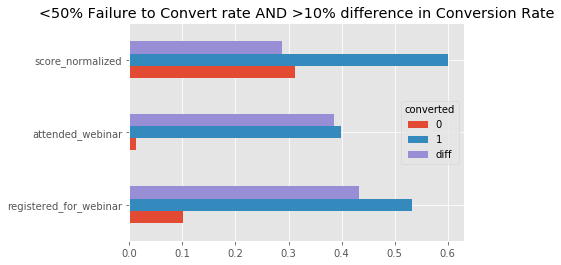

In [81]:
test_df_gt10pct_pos_diff = test_df_lt50_fail_to_convert[test_df_lt50_fail_to_convert['diff']>0.09999]
test_df_gt10pct_pos_diff
test_df_gt10pct_pos_diff.plot(kind='barh')
plt.title('<50% Failure to Convert rate AND >10% difference in Conversion Rate')
plt.show()

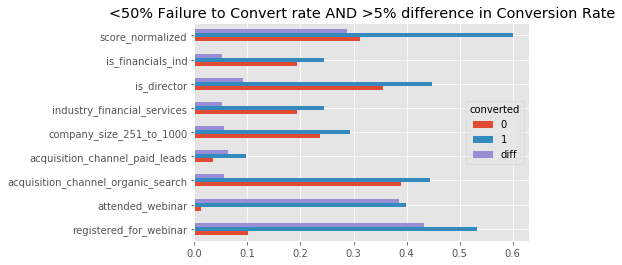

In [82]:
test_df_gt5pct_pos_diff = test_df_lt50_fail_to_convert[test_df_lt50_fail_to_convert['diff']>0.04999]
test_df_gt5pct_pos_diff.plot(kind='barh')
plt.title('<50% Failure to Convert rate AND >5% difference in Conversion Rate')
plt.show()